In [103]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [104]:
!kaggle datasets download -d austinreese/craigslist-carstrucks-data

craigslist-carstrucks-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [105]:
import zipfile
b=zipfile.ZipFile('/content/craigslist-carstrucks-data.zip','r')
b.extractall('/content')
b.close()

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [107]:
a=pd.read_csv('/content/vehicles.csv')
a.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [108]:
a.shape

(426880, 26)

In [109]:
a.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [110]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [111]:
a=a.drop(columns=['id', 'url', 'state', 'region_url', 'VIN', 'image_url', 'description',
                'county', 'lat', 'long', 'posting_date'])
a.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  drive         296313 non-null  object 
 12  size          120519 non-null  object 
 13  type          334022 non-null  object 
 14  paint_color   296677 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 48.9+ MB


In [113]:
a.isnull().sum()

region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
size            306361
type             92858
paint_color     130203
dtype: int64

In [114]:
a.isnull().mean()*100

region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
dtype: float64

In [115]:
a.duplicated().value_counts()

False    370006
True      56874
dtype: int64

Text(0, 0.5, 'Missing Value')

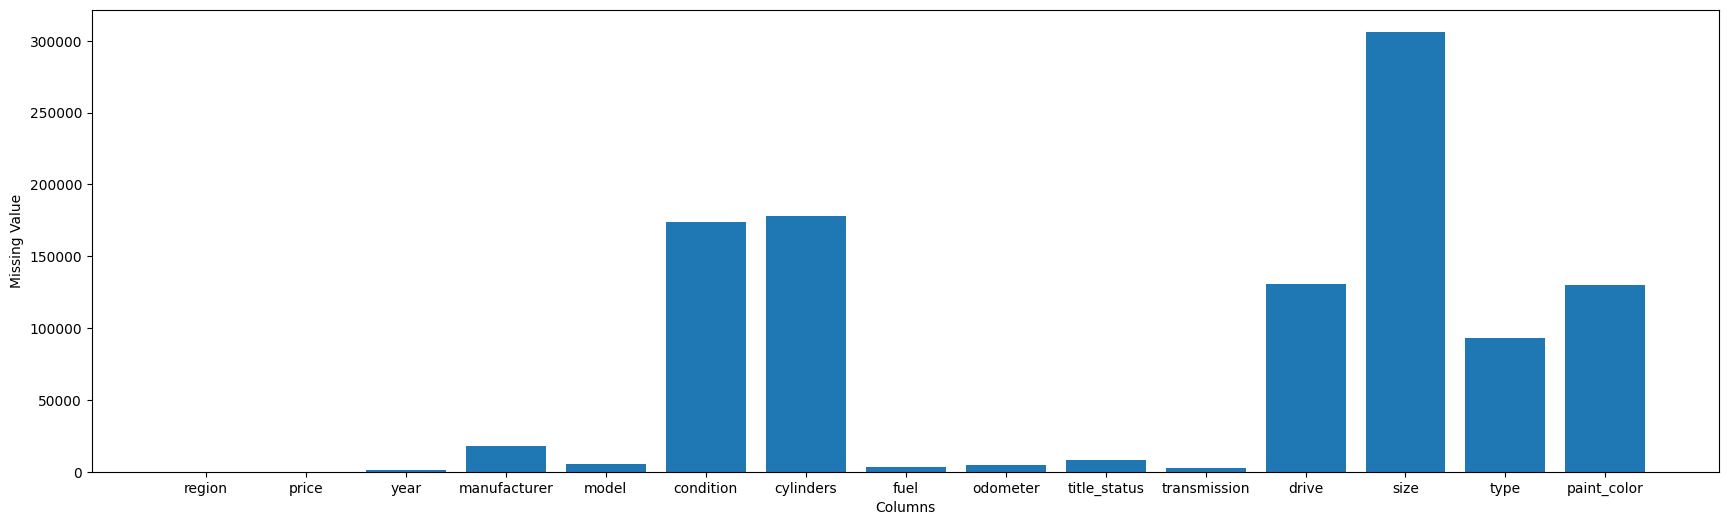

In [116]:
plt.figure(figsize=(21,6))
plt.bar(a.columns,a.isnull().sum())
plt.xlabel("Columns")
plt.ylabel("Missing Value")

In [117]:
#We can see that "year", "manufacturer", "model", and "odometer" column has less than 5% of null values.
#So we can simply drop those rows which have null values in these columns.

a=a.dropna(subset=['year','manufacturer','model','odometer'])

In [118]:
# removing rows having all columns as na
a=a.dropna(axis=0,how="all")
a.shape

(399883, 15)

In [119]:
a.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color'],
      dtype='object')

In [120]:
a.dropna(subset=['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color'], axis=0, thresh=7, inplace=True)

In [121]:
a.isnull().sum()

region               0
price                0
year                 0
manufacturer         0
model                0
condition       162031
cylinders       164246
fuel              1957
odometer             0
title_status      7121
transmission      1556
drive           119514
size            287136
type             83184
paint_color     119266
dtype: int64

In [122]:
a.duplicated().sum()

52964

In [123]:
a.shape

(399831, 15)

In [124]:
a=a.drop_duplicates()

In [125]:
a.duplicated().sum()

0

In [126]:
a.shape

(346867, 15)

In [127]:
man=a['manufacturer'].value_counts()
man.to_frame()

,manufacturer
ford,60034
chevrolet,46111
toyota,29049
honda,18087
jeep,15914
nissan,15796
ram,14641
gmc,14281
bmw,12803
dodge,11141


In [128]:
man.shape

(41,)

In [129]:
man.dtype

dtype('int64')

In [130]:
a['manufacturer']=a['manufacturer'].apply(lambda x : x if str(x) in man[:25] else "others")

In [131]:
a['manufacturer'].value_counts()

ford             60034
chevrolet        46111
toyota           29049
honda            18087
others           16149
jeep             15914
nissan           15796
ram              14641
gmc              14281
bmw              12803
dodge            11141
mercedes-benz    10087
hyundai           8439
volkswagen        8281
subaru            8196
lexus             7141
kia               6971
audi              6817
cadillac          5912
acura             5472
chrysler          5100
buick             4752
mazda             4701
infiniti          4320
lincoln           3765
volvo             2907
Name: manufacturer, dtype: int64

In [132]:
a.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color'],
      dtype='object')

In [133]:
# removed state and kept region cause state has abbreviated name of the region which makes the data more clear.
a['region']

27         auburn
28         auburn
29         auburn
30         auburn
31         auburn
           ...   
426875    wyoming
426876    wyoming
426877    wyoming
426878    wyoming
426879    wyoming
Name: region, Length: 346867, dtype: object

In [134]:
reg=a['region'].value_counts()
reg.to_frame()

,region
minneapolis / st paul,2813
seattle-tacoma,2759
portland,2749
sacramento,2718
SF bay area,2699
...,...
meridian,20
southwest MS,13
"fort smith, AR",8
kansas city,8


In [135]:
# 404 regions available but we will cut down to 80.
a['region']=a['region'].apply(lambda x :  x if str(x) in reg[:80] else 'others')

In [136]:
a['region'].value_counts().to_frame()

,region
others,159113
minneapolis / st paul,2813
seattle-tacoma,2759
portland,2749
sacramento,2718
...,...
sarasota-bradenton,1865
akron / canton,1860
bellingham,1858
omaha / council bluffs,1848


In [137]:
a['model']

27        sierra 1500 crew cab slt
28                  silverado 1500
29             silverado 1500 crew
30            tundra double cab sr
31                       f-150 xlt
                    ...           
426875           maxima s sedan 4d
426876    s60 t5 momentum sedan 4d
426877            xt4 sport suv 4d
426878             es 350 sedan 4d
426879    4 series 430i gran coupe
Name: model, Length: 346867, dtype: object

In [138]:
mode=a['model'].value_counts()
mode.to_frame()

,model
f-150,6452
silverado 1500,4169
1500,3346
camry,2512
silverado,2502
...,...
6 series 2dr cpe 640i rwd,1
fx4 sport f15o,1
1500trx trx,1
voyager l,1


In [139]:
# too many rows but cut shorting to 80 + 1.
a['model']=a['model'].apply(lambda x : x if x in mode[:80] else "others")

In [140]:
a['model'].value_counts().to_frame()

,model
others,240460
f-150,6452
silverado 1500,4169
1500,3346
camry,2512
...,...
colorado,631
escalade,629
200,629
durango,627


In [141]:
def check(x):
  print(x.upper(),":")
  print('Max value is ',a[x].max())
  print('Min value is ',a[x].min())
  print('Mean value is ',a[x].mean())
check('price')
check('odometer')

PRICE :
Max value is  3736928711
Min value is  0
Mean value is  69970.11767911044
ODOMETER :
Max value is  10000000.0
Min value is  0.0
Mean value is  95011.0799153566


In [142]:
a.describe()

,price,year,odometer
count,3.468670e+05,346867.000000,3.468670e+05
mean,6.997012e+04,2011.527208,9.501108e+04
std,1.213344e+07,8.876526,1.848700e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,6.000000e+03,2008.000000,3.600000e+04
50%,1.457700e+04,2014.000000,8.358900e+04
75%,2.699000e+04,2017.000000,1.330000e+05
max,3.736929e+09,2022.000000,1.000000e+07


In [143]:
# this concludes the distribution is not uniformed but skewed.
a['odometer'].skew()

42.648543544780274

In [144]:
# Error can't resolve to ask !! cant find out whether the distribution is uniform
# or skewed through graphs here we calculated using diffrent approach
"""
import seaborn as sns
def check(x):
  sns.histplot(data=a[x])
  sns.boxplot(data=a[x])
check('price')
"""
a['price'].skew()

267.5683475430122

In [145]:
# so removing outliers from price and odometer.

price_q25=a['price'].quantile(0.25)
price_q75=a['price'].quantile(0.75)

price_iqr=price_q75-price_q25
price_q25

6000.0

In [146]:
price_q75

26990.0

In [147]:
price_iqr

20990.0

In [148]:
price_upper_limit = price_q75 + 1.5 * price_iqr
price_lower_limit = price_q25 - 1.5 * price_iqr

In [149]:
# since lower limit can't be negative we will assume lower quartile by trial and error.
price_lower_limit

-25485.0

In [150]:
price_lower_limit=a['price'].quantile(0.1)
price_lower_limit

1500.0

In [151]:
price_upper_limit

58475.0

<Axes: >

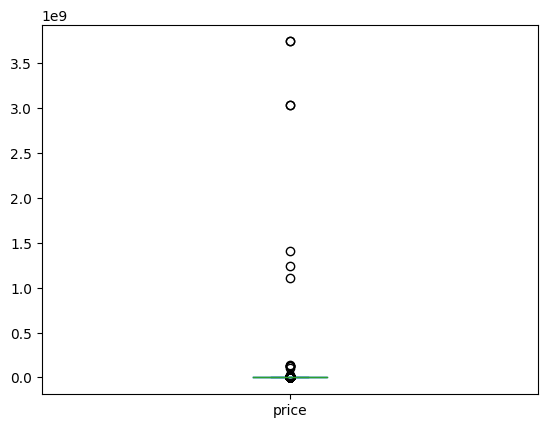

In [152]:
a.price.plot(kind='box')

<Axes: >

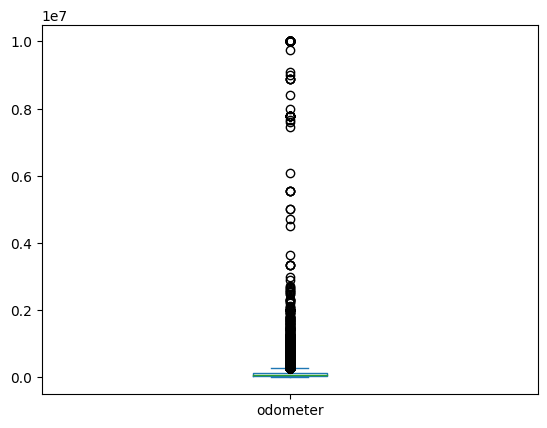

In [153]:
a.odometer.plot(kind='box')

<Axes: >

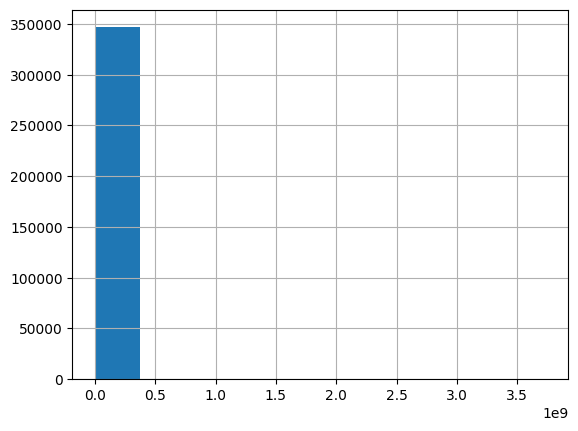

In [154]:
a.price.hist()

In [155]:
a = a[(a['price'] < price_upper_limit) & (a['price'] > price_lower_limit)]

<Axes: >

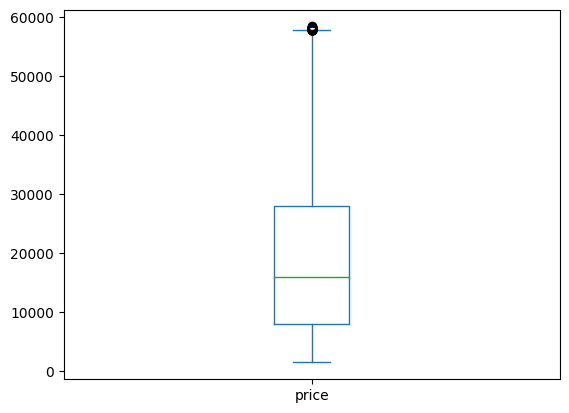

In [156]:
a.price.plot(kind='box')

<Axes: >

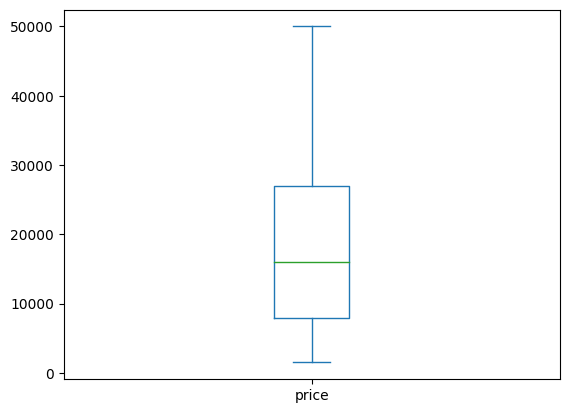

In [157]:

# we reduced the outliers by a lot but still we can see some in upper range.
price_upper_limit=50000
a = a[(a['price'] < price_upper_limit) & (a['price'] > price_lower_limit)]
a.price.plot(kind='box')

In [158]:
o_q75 = a['odometer'].quantile(0.75)
o_q25 = a['odometer'].quantile(0.25)
o_iqr = o_q75 - o_q25
odometer_upper_limit = o_q75 + 1.5 * o_iqr
odometer_lower_limit = o_q25 - 1.5 * o_iqr

<Axes: >

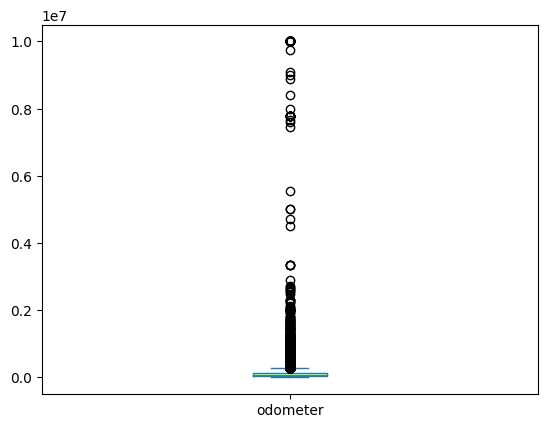

In [159]:
a.odometer.plot(kind='box')

In [160]:
odometer_lower_limit

-109239.875

In [161]:
odometer_upper_limit

283101.125

In [162]:
odometer_lower_limit=a['odometer'].quantile(0.1)
odometer_lower_limit

15910.0

In [163]:
a = a[(a['odometer'] < odometer_upper_limit) & (a['odometer'] > odometer_lower_limit)]

<Axes: >

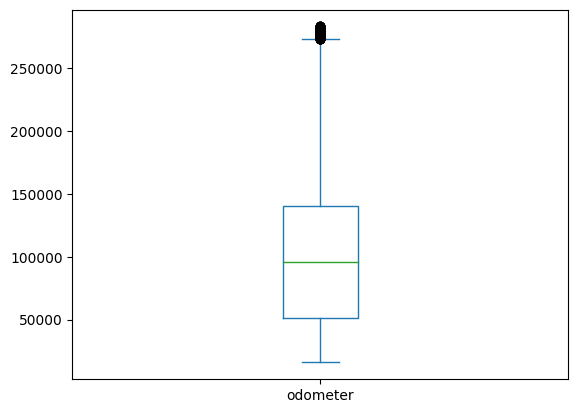

In [164]:
a.odometer.plot(kind='box')

<Axes: >

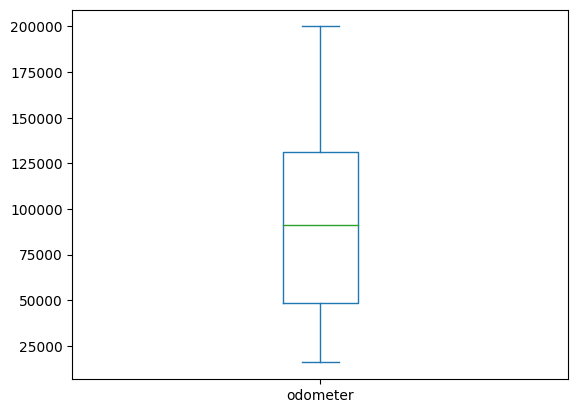

In [165]:
# reducing odometer_upper_limit by assumptions
odometer_upper_limit=200000
a = a[(a['odometer'] < odometer_upper_limit) & (a['odometer'] > odometer_lower_limit)]
a.odometer.plot(kind='box')

<Axes: >

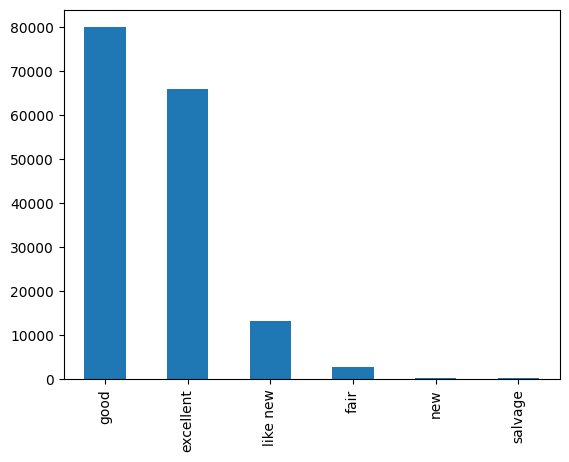

In [166]:
a.condition.value_counts().plot(kind='bar')

<Axes: >

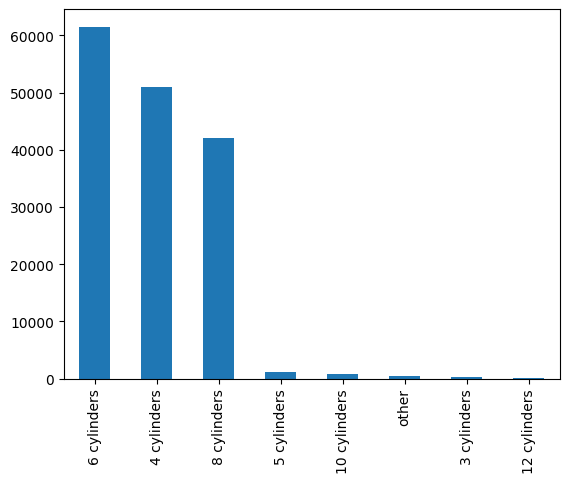

In [167]:
a.cylinders.value_counts().plot(kind='bar')

<Axes: >

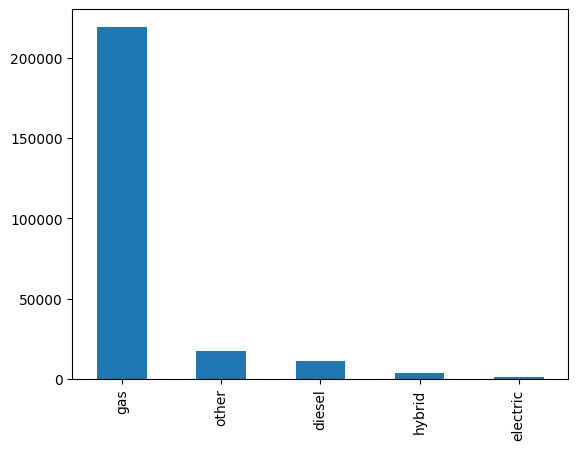

In [168]:
a.fuel.value_counts().plot(kind='bar')

<Axes: >

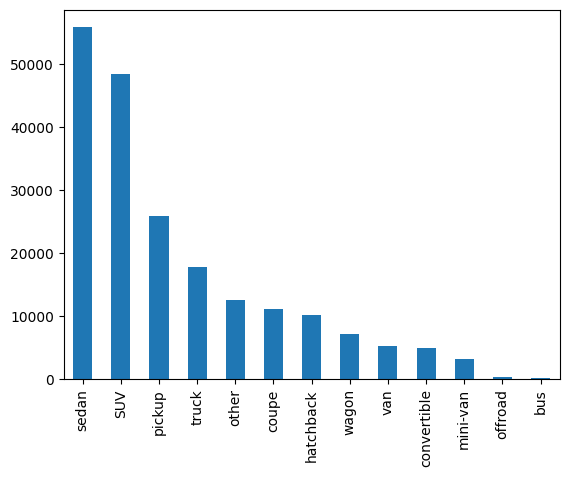

In [169]:
a.type.value_counts().plot(kind='bar')

In [170]:
# converting format to just year.
a['year']=pd.to_datetime(a['year'],errors='ignore',format='%y')

In [171]:
a['year']

27        2014
28        2010
29        2020
30        2017
31        2013
          ... 
426872    2020
426874    2018
426875    2019
426878    2018
426879    2019
Name: year, Length: 254365, dtype: object

<Axes: xlabel='year', ylabel='count'>

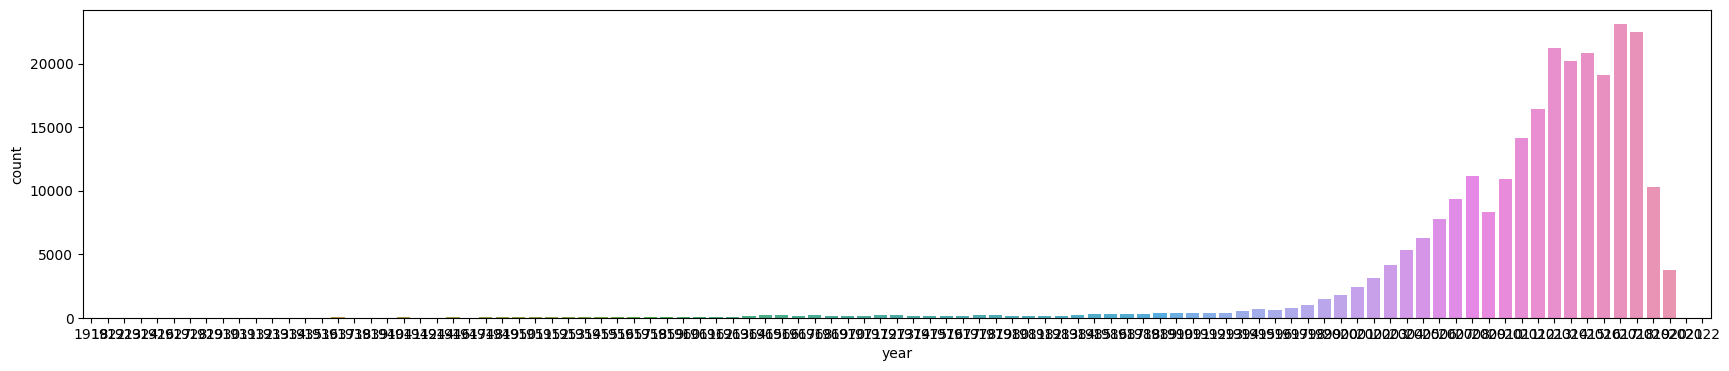

In [172]:
import seaborn as sns
plt.figure(figsize=(21,4))
sns.countplot(x='year',data=a)

In [173]:
# we can see data bfore 1997 is useless so.
a=a[a['year']>1997]

In [174]:
a.shape

(244572, 15)

In [175]:
a['year'] = a['year'].astype(int)

<ipython-input-175-4fa7ad8d99c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['year'] = a['year'].astype(int)


In [176]:
a['odometer'] = a['odometer'].astype(int)

In [177]:
a['year']=2023-a['year']

In [178]:
a.describe()

,price,year,odometer
count,244572.000000,244572.000000,244572.000000
mean,18018.331326,10.517079,92812.121490
std,11409.598605,4.860829,49487.322293
min,1550.000000,1.000000,15911.000000
25%,8200.000000,7.000000,48000.000000
50%,15900.000000,10.000000,91000.000000
75%,25995.000000,14.000000,131520.000000
max,49999.000000,25.000000,199999.000000


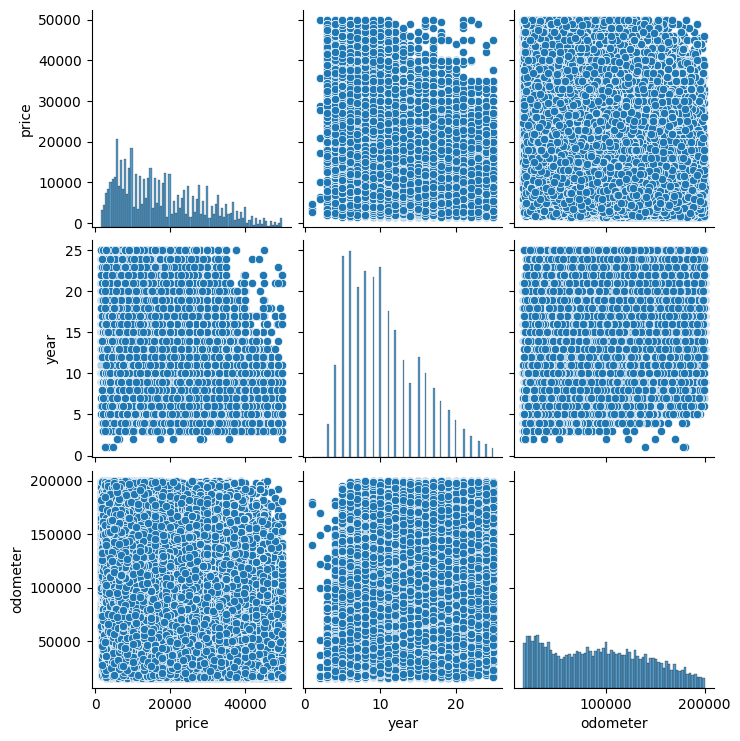

In [179]:
sns.pairplot(a)

In [180]:
a.corr()

<ipython-input-180-210c353a220b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  a.corr()


,price,year,odometer
price,1.000000,-0.610243,-0.575531
year,-0.610243,1.000000,0.629127
odometer,-0.575531,0.629127,1.000000


<ipython-input-181-09611b260d52>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(a.corr(),annot=True)


<Axes: >

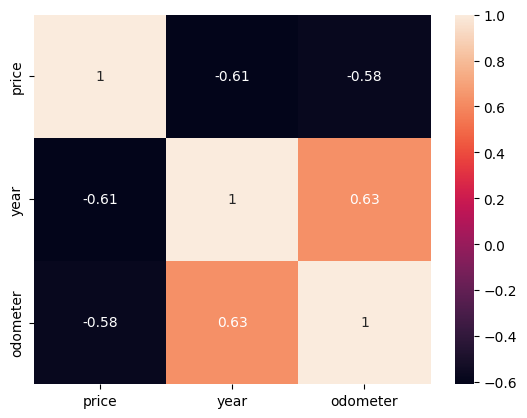

In [181]:
sns.heatmap(a.corr(),annot=True)

In [200]:
from sklearn.preprocessing import LabelEncoder
le_manufacturer = LabelEncoder()
le_model = LabelEncoder()
le_fuel = LabelEncoder()
le_title_status = LabelEncoder()
le_transmission = LabelEncoder()
le_condition = LabelEncoder()
le_drive = LabelEncoder()
le_type = LabelEncoder()
le_color = LabelEncoder()
le_region = LabelEncoder()
le_cylinders = LabelEncoder()
le_size = LabelEncoder()

a["size"] = le_size.fit_transform(a['size'])
a["type"] = le_type.fit_transform(a['type'])
a["cylinders"] = le_cylinders.fit_transform(a['cylinders'])
a["manufacturer"] = le_manufacturer.fit_transform(a['manufacturer'])
a['paint_color'] = le_color.fit_transform(a['paint_color'])
a['drive'] = le_drive.fit_transform(a['drive'])
a["fuel"] = le_fuel.fit_transform(a['fuel'])
a["title_status"] = le_title_status.fit_transform(a['title_status'])
a['transmission'] = le_transmission.fit_transform(a['transmission'])
a['condition'] = le_condition.fit_transform(a['condition'])
a['region'] = le_region.fit_transform(a['region'])
a['model'] = le_model.fit_transform(a['model'])

a.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
27,55,33590,9,9,50,2,6,2,57923,0,2,3,4,8,10
28,55,22590,13,5,65,2,6,2,71229,0,2,3,4,8,1
29,55,39590,3,5,50,2,6,2,19160,0,2,3,4,8,8
30,55,30990,6,23,50,2,6,2,41124,0,2,3,4,8,8
31,55,15000,10,8,50,0,5,2,128000,0,0,2,1,10,0


In [201]:
a.corr()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
region,1.000000,0.012890,-0.010548,-0.014802,0.003986,-0.015117,0.016013,0.003292,-0.006675,-0.001849,0.012728,0.023451,0.017941,0.003908,0.013060
price,0.012890,1.000000,-0.610243,-0.054426,0.052255,0.092105,0.225881,0.000785,-0.575531,-0.085087,0.315886,-0.074778,0.186114,-0.050339,-0.020107
year,-0.010548,-0.610243,1.000000,0.008385,0.008153,-0.090812,-0.090188,-0.162500,0.629127,-0.003979,-0.266569,0.013345,-0.167188,0.071384,0.037689
manufacturer,-0.014802,-0.054426,0.008385,1.000000,-0.060757,-0.004912,-0.073253,-0.016066,0.002612,0.011623,0.013936,-0.075572,0.003683,0.018085,0.001263
model,0.003986,0.052255,0.008153,-0.060757,1.000000,-0.070579,0.034024,0.067177,-0.031305,0.014862,0.089844,-0.008156,0.011906,-0.062169,-0.001968
condition,-0.015117,0.092105,-0.090812,-0.004912,-0.070579,1.000000,0.276964,-0.014206,-0.003150,-0.072033,-0.136769,0.129542,0.255246,0.142670,0.124171
cylinders,0.016013,0.225881,-0.090188,-0.073253,0.034024,0.276964,1.000000,0.119070,-0.097856,-0.100759,0.173016,0.293013,0.357781,0.173131,0.161575
fuel,0.003292,0.000785,-0.162500,-0.016066,0.067177,-0.014206,0.119070,1.000000,-0.198156,-0.008048,0.273845,0.111723,0.134197,-0.105132,-0.047984
odometer,-0.006675,-0.575531,0.629127,0.002612,-0.031305,-0.003150,-0.097856,-0.198156,1.000000,-0.005271,-0.411109,-0.065508,-0.170767,0.092404,0.056542
title_status,-0.001849,-0.085087,-0.003979,0.011623,0.014862,-0.072033,-0.100759,-0.008048,-0.005271,1.000000,-0.067969,0.011432,0.009212,-0.005803,0.065594


<Axes: >

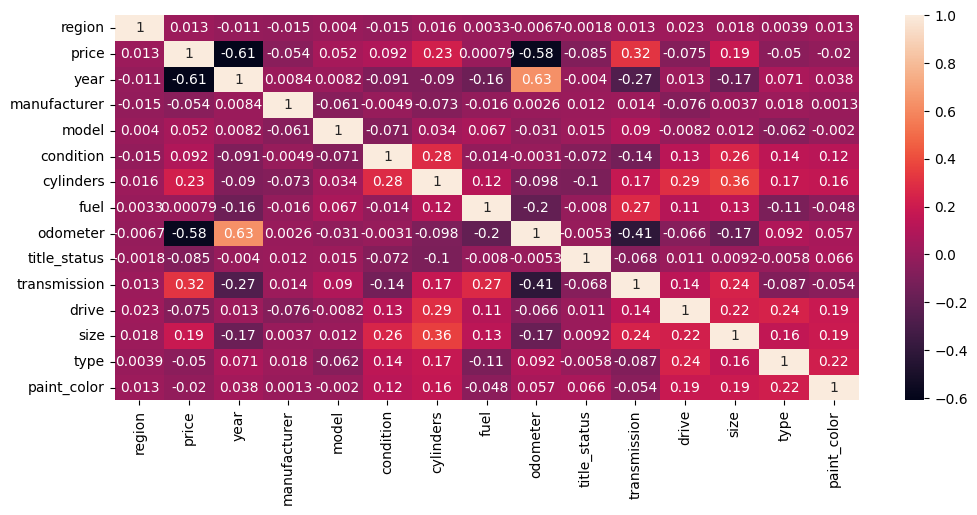

In [202]:
plt.figure(figsize=(12,5))
sns.heatmap(a.corr(),annot=True)

In [203]:
from sklearn.model_selection import train_test_split


In [204]:
X_train, X_test, y_train, y_test = train_test_split(a.drop(['price'], axis = 1), a['price'],
                                                    random_state = 42, test_size = .2)

In [208]:
from sklearn.metrics import mean_squared_log_error,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
from sklearn.ensemble import RandomForestRegressor

In [206]:
RFR = RandomForestRegressor(n_estimators=150,random_state=0, min_samples_leaf=1, max_features=0.3, n_jobs=-1, oob_score=True)
RFR.fit(X_train, y_train)
y_pred = RFR.predict(X_test)

In [209]:
def check(x,y):
  predictions=RFR.predict(x)
  mse=mean_squared_error(y,predictions)
  mae=mean_absolute_error(y,predictions)
  mape=mean_absolute_percentage_error(y,predictions)

  print("MSE =",mse)
  print("MAE =",mae)
  print("MAPE =",mape)

check(X_test,y_test)

#The lower these evaluation metrics are, the better the model.


MSE = 11984151.051373664
MAE = 2012.0271713133582
MAPE = 0.19238510809023712
